# SPINN viz

In [ ]:
import os
import pickle
import numpy as np
from zpinn.spinn_cleanup import load_spinn_mag

In [ ]:
input_path = 'spinn_hmi'
input_original = os.path.join(input_path, 'original')
b_bottom_original_path = os.path.join(input_original, "b_bottom_original.pickle")

with open(b_bottom_original_path, "rb") as f:
    b_bottom = pickle.load(f)

In [ ]:
Nx, Ny, _ = b_bottom.shape

In [ ]:
bin = 2
b_norm = 2500
spatial_norm = 160
Nz = 160

In [ ]:
spinn_iter = 2000
result_path = 'spinn_hmi/output'
params_path = os.path.join(result_path, f"params_{spinn_iter}.pickle")

In [ ]:
B = load_spinn_mag(params_path, Nx, Ny, Nz, b_norm)

In [ ]:
B = np.array(B)
B.shape

(344, 224, 160, 3)

In [ ]:
import matplotlib.pyplot as plt

<matplotlib.image.AxesImage>

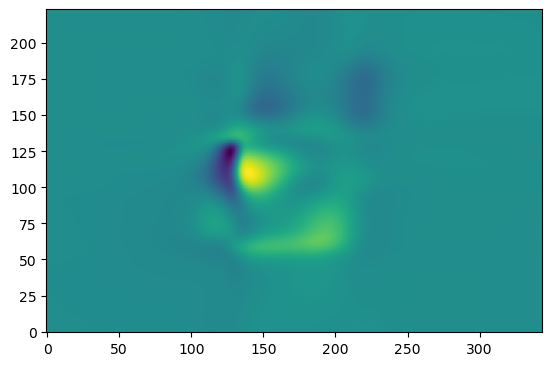

In [ ]:
plt.imshow(B[:, :, 0, 2].transpose(), origin='lower')

In [ ]:
from nf2.evaluation.metric import *

In [ ]:
n_div = (np.abs(divergence(B)) / vector_norm(B)).mean()
theta = weighted_theta(B)

print('DIVERGENCE [1/pix]: %.04f; THETA [deg] %.04f' % (n_div, theta))

DIVERGENCE [1/pix]: 0.0168; THETA [deg] 35.8976


In [ ]:
from tvtk.api import tvtk, write_data

In [ ]:
vtk_path = 'spinn_hmi/output/B.vtk'

In [ ]:
Mm_per_pix=360e-3
pts = np.stack(np.mgrid[0:Nx, 0:Ny, 0:Nz], -1).astype(np.int64) * Mm_per_pix * bin
pts = pts.transpose(2, 1, 0, 3)
pts = pts.reshape((-1, 3))
vectors = B.transpose(2, 1, 0, 3)
vectors = vectors.reshape((-1, 3))

sg = tvtk.StructuredGrid(dimensions=(Nx, Ny, Nz), points=pts)
sg.point_data.vectors = vectors
sg.point_data.vectors.name = 'B'

scalars = np.linalg.norm(vectors, axis=-1)
sg.point_data.add_array(scalars)
sg.point_data.get_array(1).name = 'mag'
sg.point_data.update()

write_data(sg, vtk_path)

In [ ]:
import pyvista as pv

In [ ]:
B_mesh = pv.read(vtk_path) 

In [ ]:
from zpinn.pinn_nf2_visualization import draw_grid

In [ ]:
B_grid = draw_grid(B_mesh)

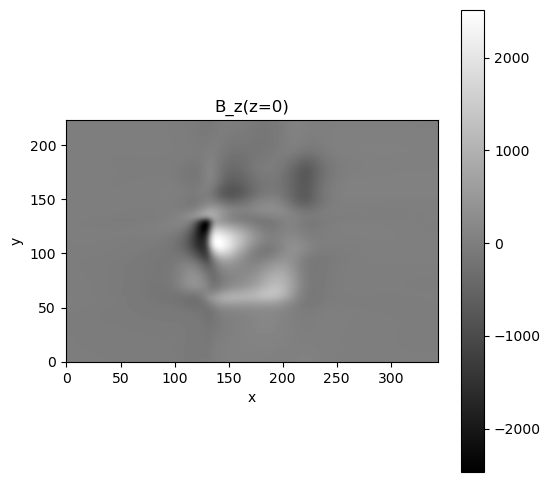

In [ ]:
B_grid.plt_Bz_imshow(z=0)

/home/tensor/mambaforge/envs/zpinn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame_vtk.tools'

Falling back to a static output.
  warnings.warn(


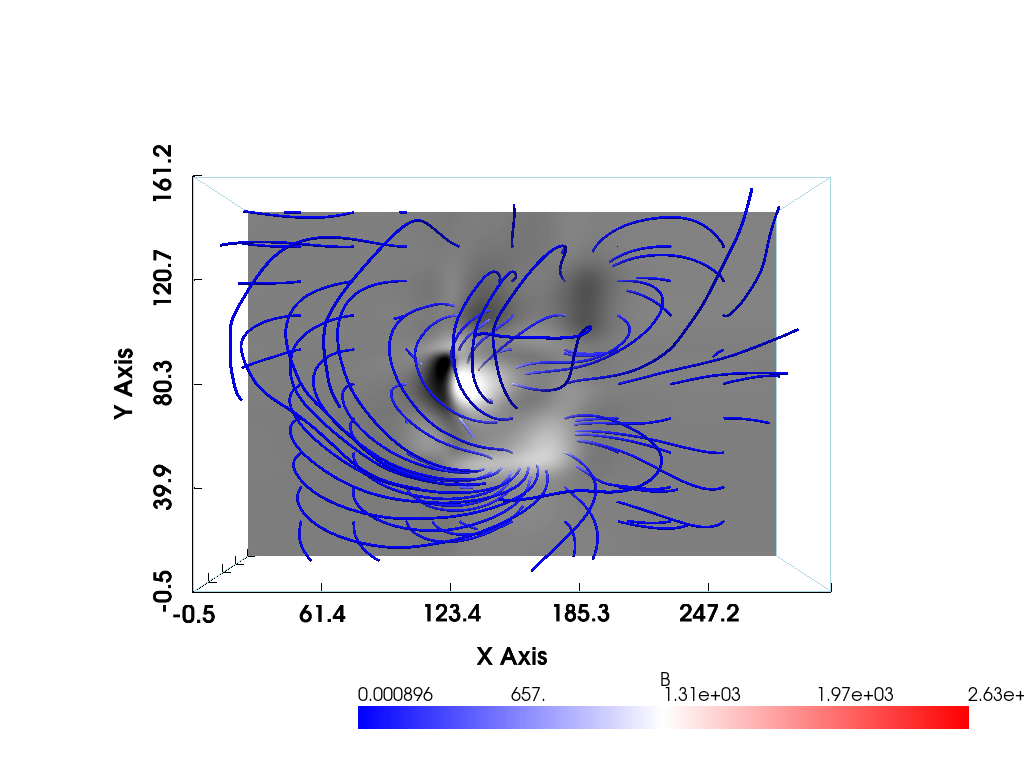

In [ ]:
B_grid.pv_streamline_Bz('xy')